# Part 1 - DEFINE

### ---- 1 Define the problem ----

The purpose of this project is to explore the trends of inmates convicted of the death penalty.  It will conclude with analyzing each inmate's last statement prior to being executed. 

In [61]:
__author__ = "Arielle Dortch"
__email__ = "arielledortch@gmail.com"

#import all necessary packages
import math
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

##Create first data frame with csv describing all inmates that received the death penalty in the US
df= pd.read_csv('database.csv')
##clean up column names to simplify indexing
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Date,Name,Age,Sex,Race,Crime,Victim_Count,Victim_Sex,Victim_Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign_National
0,1/17/77,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,5/25/79,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/79,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,3/9/81,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,8/10/82,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


## Part 2 - DISCOVER (All Death Row Inmates)

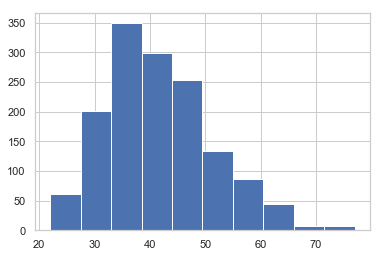

In [28]:
##Create age histogram to target most common age range of inmate on death row
df.Age.hist()

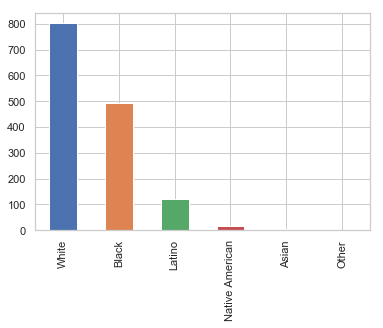

In [29]:
##Create bar plot to identify most common race of inmate on death row
df.Race.value_counts().plot.bar()

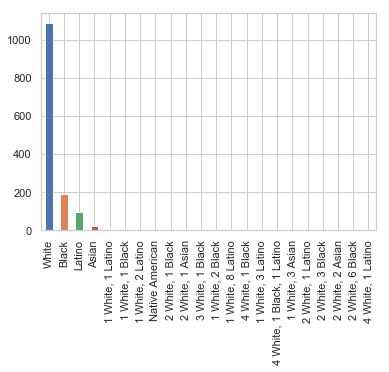

In [62]:
##Create bar plot to identify most common race of victim 
df.Victim_Race.value_counts().plot.bar()

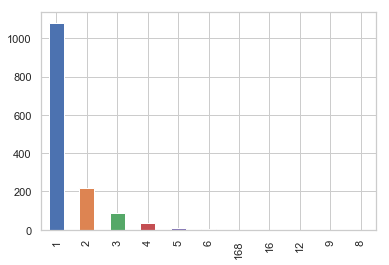

In [64]:
##Create bar plot to identify most common victim count
df.Victim_Count.value_counts().plot.bar()

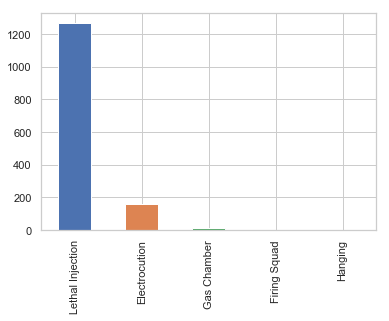

In [65]:
##Create bar plot to identify most common method of execution
df.Method.value_counts().plot.bar()

## Part 3 - DISCOVER (Texas Death Row Inmates)

This next portion further explores inmates in Texas.  Texas had byfar the greatest amount of inmates on death row.

In [69]:
##Bring in second csv file to explore each inmate's last statement.  This data only contains inmates in Texas.
df2 = pd.read_csv('executed_offenders_with_additional_info.csv', encoding = 'Windows-1252')
df2.head()

,ID,FirstName,LastName,OffenderInfoLink,LastStatement,TDCJNumber,Age,ExecutionDate,Race,County,...,DateOfOffense,AgeTimeOfOffense,Gender,HairColor,HeightInches,WeightPounds,EyeColor,NativeCounty,NativeState,TDCJNumber.1
0,1,Charlie,"Brooks, Jr.",https://www.tdcj.state.tx.us/death_row/dr_info...,"Statement to the Media: I, at this very moment...",592,40,12/7/82,Black,Tarrant,...,12/14/76,34.0,Male,Black,69.0,150.0,mar (according to DPS records),Tarrant,Texas,592.0
1,2,James,Autry,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,670,29,3/14/84,White,Jefferson,...,4/20/80,25.0,Male,Brown,68.0,137.0,Brown,Potter,Texas,670.0
2,3,Ronald,O'Bryan,https://www.tdcj.state.tx.us/death_row/dr_info...,What is about to transpire in a few moments is...,529,39,3/31/84,White,Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Thomas,Barefoot,https://www.tdcj.state.tx.us/death_row/dr_info...,"When asked if he had a last statement, he rep...",621,39,10/30/84,White,Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Doyle,Skillern,https://www.tdcj.state.tx.us/death_row/dr_info...,I pray that my family will rejoice and will fo...,518,49,1/16/85,White,Lubbock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
##1st information to explore is how long each inmate has been on death row by locating the age at the time of offense.
df2_age = df2.loc[df2['AgeTimeOfOffense'].notnull()]

In [71]:
##Next, take the inmate's current age and subtract the age at the time they committed the offense
df2_age['TimeOnDeathRow'] = df2_age['Age'] - df2_age['AgeTimeOfOffense']

/Users/arielledortch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df2_age.head(10)

,ID,FirstName,LastName,OffenderInfoLink,LastStatement,TDCJNumber,Age,ExecutionDate,Race,County,...,AgeTimeOfOffense,Gender,HairColor,HeightInches,WeightPounds,EyeColor,NativeCounty,NativeState,TDCJNumber.1,TimeOnDeathRow
0,1,Charlie,"Brooks, Jr.",https://www.tdcj.state.tx.us/death_row/dr_info...,"Statement to the Media: I, at this very moment...",592,40,12/7/82,Black,Tarrant,...,34.0,Male,Black,69.0,150.0,mar (according to DPS records),Tarrant,Texas,592.0,6.0
1,2,James,Autry,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,670,29,3/14/84,White,Jefferson,...,25.0,Male,Brown,68.0,137.0,Brown,Potter,Texas,670.0,4.0
20,21,Ramon,Hernandez,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,667,44,1/30/87,Hispanic,El Paso,...,38.0,Male,Black,63.0,130.0,Brown,El Paso,Texas,667.0,6.0
65,66,Ruben,Cantu,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,804,26,8/24/93,Hispanic,Bexar,...,17.0,Male,Black,61.0,142.0,Brown,Bexar,Texas,804.0,9.0
152,153,Clifford,Boggess,https://www.tdcj.state.tx.us/death_row/dr_info...,Iêd like to say that for the murders of Ray Ha...,887,32,6/11/98,White,Clay,...,21.0,Male,Red,74.0,232.0,Brown,Brunswick,Georgia,887.0,11.0
173,174,Aaron,Foust,https://www.tdcj.state.tx.us/death_row/dr_info...,"Adios, amigos, Iêll see yaêll on the other sid...",999268,26,4/28/99,White,Tarrant,...,24.0,Male,NaN,72.0,180.0,NaN,Lafayette,Tennessee,999268.0,2.0
262,263,Jose,"Santellan, Sr.",https://www.tdcj.state.tx.us/death_row/dr_info...,"First of all, I would like to apologize to the...",999140,40,4/10/02,Hispanic,Kerr,...,31.0,Male,Black,61.0,189.0,Brown,Wise,Texas,999140.0,9.0
290,291,John,Baltazar,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,999257,30,1/15/03,Hispanic,Nueces,...,25.0,Male,Black,71.0,155.0,Brown,Nueces,Texas,999257.0,5.0
297,298,Richard,Williams,https://www.tdcj.state.tx.us/death_row/dr_info...,Spoken: The statement I would like to make is...,999251,33,2/25/03,Black,Harris,...,27.0,Male,Black,72.0,208.0,Brown,Harris,Texas,999251.0,6.0
299,300,Keith,Clay,https://www.tdcj.state.tx.us/death_row/dr_info...,I would like to say first and foremost to the ...,999238,35,3/20/03,Black,Harris,...,25.0,Male,Black,69.0,180.0,Brown,Harris,Texas,999238.0,10.0


In [73]:
##Group by race
df2_age.groupby(['Race'], as_index=False).mean()

,Race,ID,TDCJNumber,Age,PK_ID,AgeWhenReceived,EducationLevel,AgeTimeOfOffense,HeightInches,WeightPounds,TDCJNumber.1,TimeOnDeathRow
0,Black,428.589286,981509.696429,36.803571,79.678571,27.500000,10.500000,25.803571,67.890909,190.196429,981509.696429,11.000000
1,Hispanic,422.744186,952915.209302,36.883721,78.000000,27.930233,9.302326,26.255814,65.627907,181.674419,952915.209302,10.627907
2,Hispanic,529.000000,999360.000000,35.000000,12.000000,20.000000,8.000000,18.000000,65.000000,183.000000,999360.000000,17.000000
3,White,427.920000,959423.600000,39.840000,75.620000,30.880000,9.200000,29.360000,68.160000,187.260000,959423.600000,10.480000
4,White,506.000000,999334.000000,43.000000,30.000000,29.000000,12.000000,28.000000,69.000000,188.000000,999334.000000,15.000000


In [74]:
##There were two columns for some races (probably due to their being males and females), so the next step will group into one category per race
stripper = lambda x: x.strip()

df2_age['Race'] = df2_age['Race'].apply(stripper)

/Users/arielledortch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
##This step will give us the average of each category by race
df2_age.groupby('Race', as_index=False).mean()

,Race,ID,TDCJNumber,Age,PK_ID,AgeWhenReceived,EducationLevel,AgeTimeOfOffense,HeightInches,WeightPounds,TDCJNumber.1,TimeOnDeathRow
0,Black,428.589286,981509.696429,36.803571,79.678571,27.500000,10.500000,25.803571,67.890909,190.196429,981509.696429,11.000000
1,Hispanic,425.159091,953970.772727,36.840909,76.500000,27.750000,9.272727,26.068182,65.613636,181.704545,953970.772727,10.772727
2,White,429.450980,960206.156863,39.901961,74.725490,30.843137,9.254902,29.333333,68.176471,187.274510,960206.156863,10.568627


In [76]:
df2['Race'] = df2['Race'].apply(stripper)
df2.groupby('Race', as_index=False).mean()

,Race,ID,TDCJNumber,Age,PK_ID,AgeWhenReceived,EducationLevel,AgeTimeOfOffense,HeightInches,WeightPounds,TDCJNumber.1
0,Black,281.223350,548152.111675,37.609137,79.678571,27.500000,10.500000,25.803571,67.890909,190.196429,981509.696429
1,Hispanic,310.715686,627302.343137,37.107843,76.500000,27.750000,9.272727,26.068182,65.613636,181.704545,953970.772727
2,Other,121.000000,873.500000,41.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,248.203320,444084.261411,41.626556,74.725490,30.843137,9.254902,29.333333,68.176471,187.274510,960206.156863


In [77]:
##The following steps will provide information about the last statements.  The first step will be to find the length of each statement
len_state = lambda x: len(x)
df2['lengthStatement'] = df2['LastStatement'].apply(len_state)

In [78]:
df2.head()

,ID,FirstName,LastName,OffenderInfoLink,LastStatement,TDCJNumber,Age,ExecutionDate,Race,County,...,AgeTimeOfOffense,Gender,HairColor,HeightInches,WeightPounds,EyeColor,NativeCounty,NativeState,TDCJNumber.1,lengthStatement
0,1,Charlie,"Brooks, Jr.",https://www.tdcj.state.tx.us/death_row/dr_info...,"Statement to the Media: I, at this very moment...",592,40,12/7/82,Black,Tarrant,...,34.0,Male,Black,69.0,150.0,mar (according to DPS records),Tarrant,Texas,592.0,859
1,2,James,Autry,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,670,29,3/14/84,White,Jefferson,...,25.0,Male,Brown,68.0,137.0,Brown,Potter,Texas,670.0,50
2,3,Ronald,O'Bryan,https://www.tdcj.state.tx.us/death_row/dr_info...,What is about to transpire in a few moments is...,529,39,3/31/84,White,Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777
3,4,Thomas,Barefoot,https://www.tdcj.state.tx.us/death_row/dr_info...,"When asked if he had a last statement, he rep...",621,39,10/30/84,White,Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715
4,5,Doyle,Skillern,https://www.tdcj.state.tx.us/death_row/dr_info...,I pray that my family will rejoice and will fo...,518,49,1/16/85,White,Lubbock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63


## Part 4-Analyze Last Statements

In [79]:
##The next step is to identify the inmates that declined a last statement
dec_state = lambda x: 1 if 'This offender' in x else 0
df2['declined'] = df2['LastStatement'].apply(dec_state)

In [80]:
df2.head()

,ID,FirstName,LastName,OffenderInfoLink,LastStatement,TDCJNumber,Age,ExecutionDate,Race,County,...,Gender,HairColor,HeightInches,WeightPounds,EyeColor,NativeCounty,NativeState,TDCJNumber.1,lengthStatement,declined
0,1,Charlie,"Brooks, Jr.",https://www.tdcj.state.tx.us/death_row/dr_info...,"Statement to the Media: I, at this very moment...",592,40,12/7/82,Black,Tarrant,...,Male,Black,69.0,150.0,mar (according to DPS records),Tarrant,Texas,592.0,859,0
1,2,James,Autry,https://www.tdcj.state.tx.us/death_row/dr_info...,This offender declined to make a last statemen...,670,29,3/14/84,White,Jefferson,...,Male,Brown,68.0,137.0,Brown,Potter,Texas,670.0,50,1
2,3,Ronald,O'Bryan,https://www.tdcj.state.tx.us/death_row/dr_info...,What is about to transpire in a few moments is...,529,39,3/31/84,White,Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777,0
3,4,Thomas,Barefoot,https://www.tdcj.state.tx.us/death_row/dr_info...,"When asked if he had a last statement, he rep...",621,39,10/30/84,White,Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715,0
4,5,Doyle,Skillern,https://www.tdcj.state.tx.us/death_row/dr_info...,I pray that my family will rejoice and will fo...,518,49,1/16/85,White,Lubbock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,0


In [81]:
##This step is to explore final statements by race
df2.groupby('Race', as_index=False).mean()

,Race,ID,TDCJNumber,Age,PK_ID,AgeWhenReceived,EducationLevel,AgeTimeOfOffense,HeightInches,WeightPounds,TDCJNumber.1,lengthStatement,declined
0,Black,281.223350,548152.111675,37.609137,79.678571,27.500000,10.500000,25.803571,67.890909,190.196429,981509.696429,442.558376,0.197970
1,Hispanic,310.715686,627302.343137,37.107843,76.500000,27.750000,9.272727,26.068182,65.613636,181.704545,953970.772727,430.794118,0.176471
2,Other,121.000000,873.500000,41.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.000000,0.000000
3,White,248.203320,444084.261411,41.626556,74.725490,30.843137,9.254902,29.333333,68.176471,187.274510,960206.156863,450.311203,0.211618


In [82]:
##This step is to explore final statements by age
df2_len_statement = df2[['Age','lengthStatement']]
df2_len_statement.head()

,Age,lengthStatement
0,40,859
1,29,50
2,39,777
3,39,715
4,49,63


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


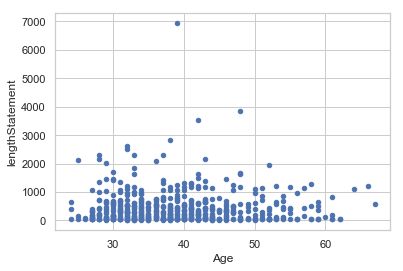

In [83]:
##Scatter Plot of length of final statements by age
df2_len_statement.plot.scatter(x='Age', y='lengthStatement')

In [84]:
##Correlation between age and length of last statement
df2_len_statement['Age'].corr(df2['lengthStatement'])

-0.025863036228636706

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


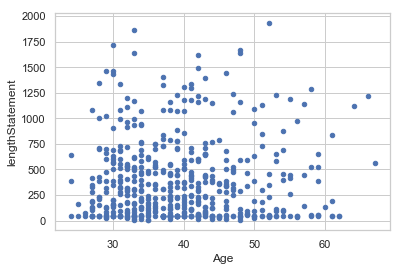

In [85]:
##Scatter plot of length of last statements that were less than 2000 characters to clean up the noise in the data
df2_len_statement = df2_len_statement.loc[(df2_len_statement['lengthStatement'] < 2000)]
df2_len_statement.plot.scatter(x='Age', y='lengthStatement')

In [86]:
##Preparing data for word cloud
last_words = ''
for index, row in df2.iterrows():
    last_words += row['LastStatement']
last_words

'Statement to the Media: I, at this very moment, have absolutely no fear of what may happen to this body.  My fear is for Allah, God only, who has at this moment the only power to determine if I should live or die... As a devout Muslim, I am taught and believe that this material life is only for the express purpose of preparing oneself for the real life that is to come... Since becoming Muslim, I have tried to live as Allah wanted me to live.Spoken:Yes, I do.     I love you.     Asdadu an la ilah illa Allah,     Asdadu an la ilah illa Allah,     Asdadu anna Muhammadan Rasul Allah,    Asdadu anna Muhammadan Rasul Allah.     I bear witness that there is no God but Allah.     I bear witness that Muhammad is the messenger of Allah.     Inna li-Allah wa-inna ilayhi rajiun.     Verily unto Allah do we belong, Verily unto him do we return.    Be strong.  This offender declined to make a last statement.  What is about to transpire in a few moments is wrong! However, we as human beings do make 

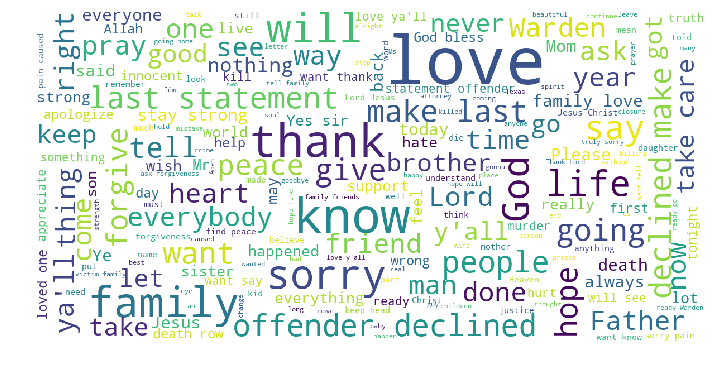

In [87]:
##Removing stop words
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
##Print wordcloud
show_wordcloud(last_words)